In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load the dataset from the CSV file

In [2]:
df=pd.read_csv('C:/Users/User/OneDrive/Desktop/CSV_files/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analyse the dataset.

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Here create a scatter plot to find some corrolation betweet features.

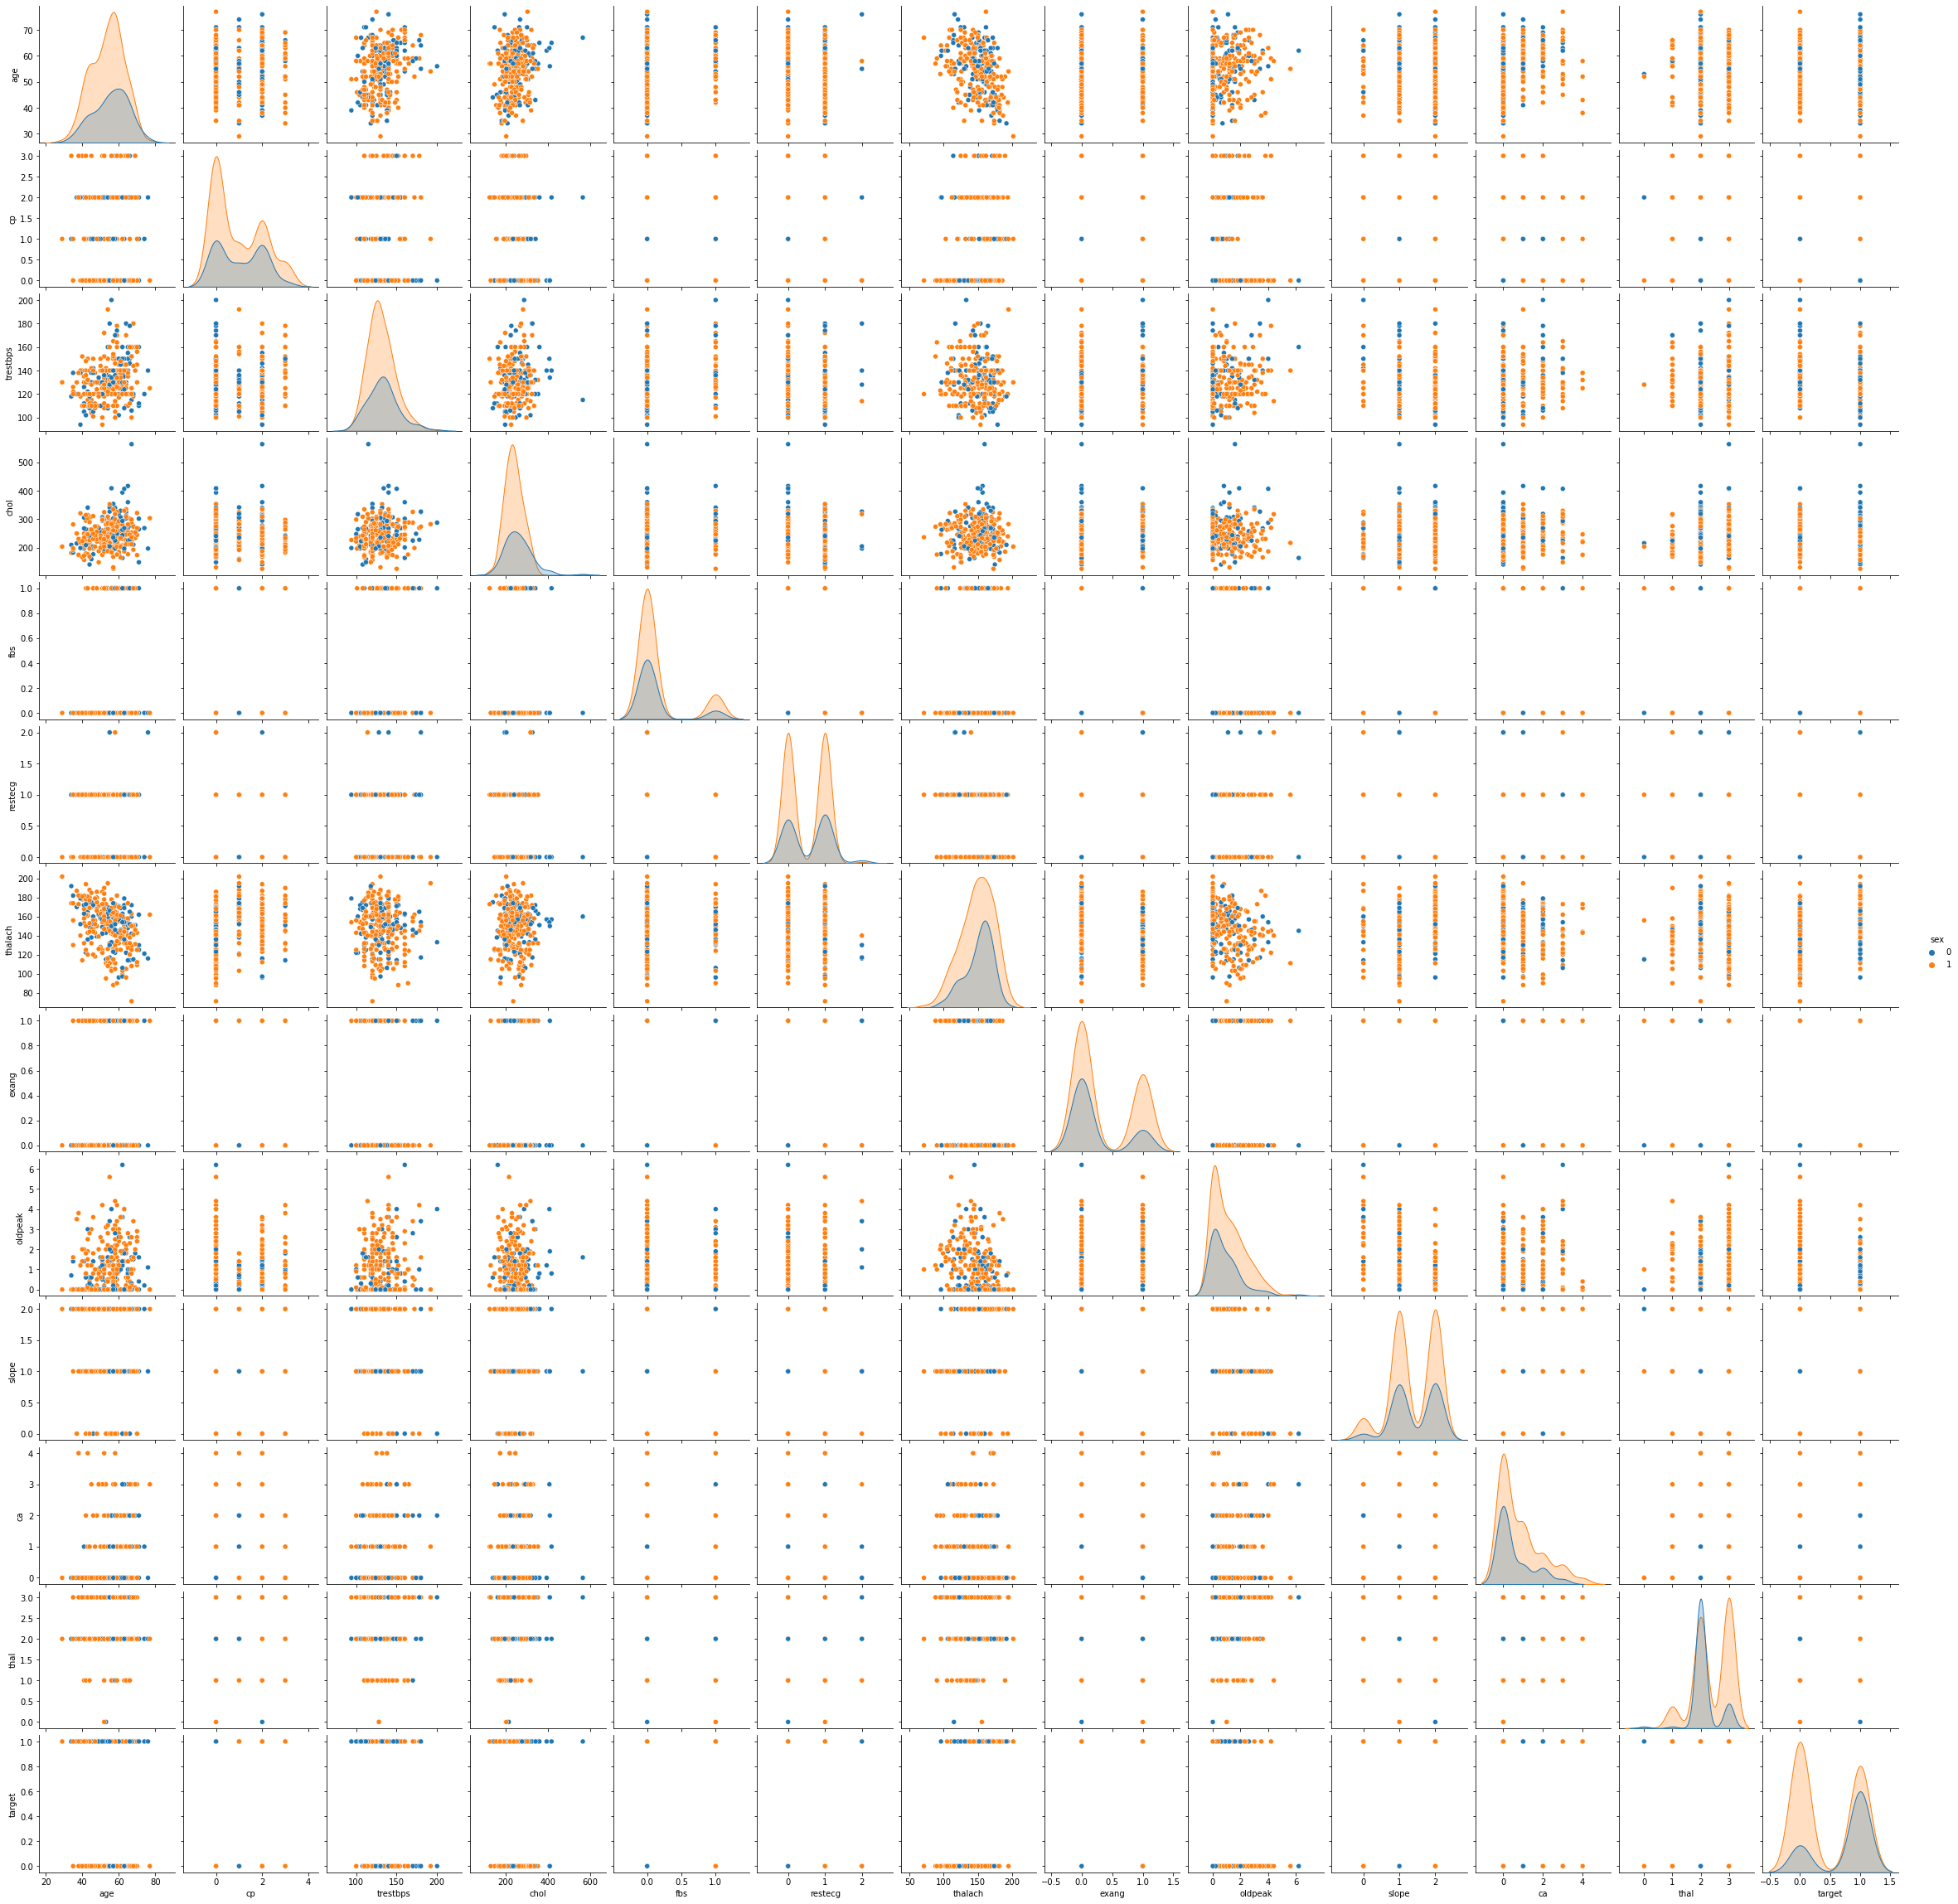

In [6]:
sns.pairplot(df,hue='sex')

# The correlation matrix is a great way to discover corrolations and good for understandin the dataset

<AxesSubplot:>

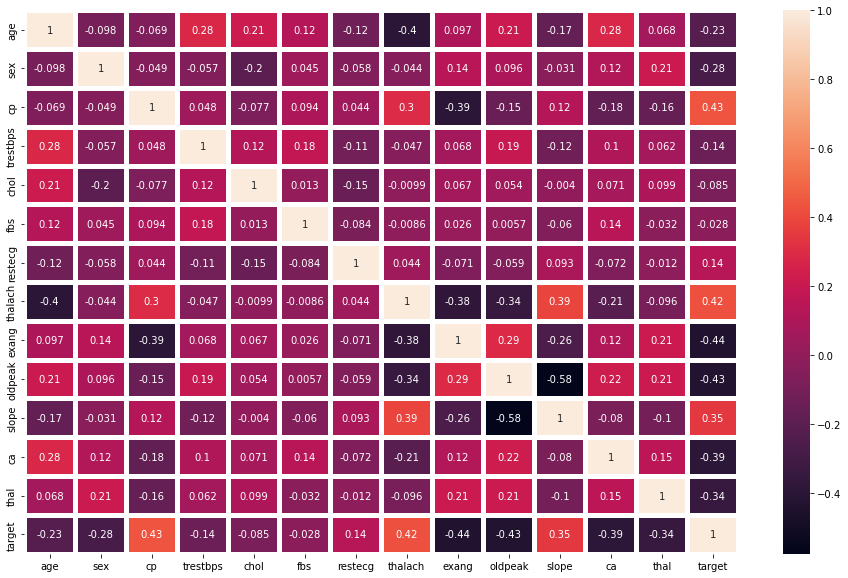

In [7]:
corr=df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True,linewidths=5)

# Find missing values

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Find outliers and delete them

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
from scipy import stats

z=np.abs(stats.zscore(df))
print(z)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [11]:
threshold=3
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [12]:
df1=df[(z<3).all(axis=1)]

In [13]:
df1.shape

(287, 14)

# Split the data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y=df['target']
x=df.drop(['target'],axis=1)

# Scaling the data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std_scaler = StandardScaler()
array1 = std_scaler.fit_transform(x)
df_std = pd.DataFrame(array1,columns = x.columns)
df_std

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [18]:
xtrain,xtest,ytrain,ytest= train_test_split(df_std,y,test_size=0.20,random_state=35,stratify=y)

# Create the model and evaluate it

# Machine Learning Model Pipeline

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model_pipline=[]
model_pipline.append(LogisticRegression(solver='liblinear'))
model_pipline.append(KNeighborsClassifier())
model_pipline.append(DecisionTreeClassifier(random_state=35))
model_pipline.append(RandomForestClassifier(random_state=35))

# Model Evaluation

In [20]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

model_list=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
train_accuracy=[]
test_accuracy=[]

for model in model_pipline:
    model.fit(xtrain,ytrain)
    y_pred_train=model.predict(xtrain)
    train_accuracy.append(accuracy_score(ytrain,y_pred_train))
    y_pred_test=model.predict(xtest)
    test_accuracy.append(accuracy_score(ytest,y_pred_test))

In [21]:
result_df=pd.DataFrame({'Model':model_list,'Training Accuracy':train_accuracy,'Testing Accuracy':test_accuracy})
result_df

,Model,Training Accuracy,Testing Accuracy
0,LogisticRegression,0.834711,0.852459
1,KNeighborsClassifier,0.888430,0.836066
2,DecisionTreeClassifier,1.000000,0.655738
3,RandomForestClassifier,1.000000,0.836066


# Hyperparameter tuning for Random Forest using GridSearchCV 

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
rf_model  = RandomForestClassifier(random_state=101)

hyp = {'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=9)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [24]:
rscv_rf_model.best_estimator_

RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=18,
                       random_state=101)

In [25]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=18,
                       random_state=101)

In [26]:
ypredtrain = rf_model.predict(xtrain)

accuracy_score(ytrain,ypredtrain)

0.8512396694214877

In [27]:
ypredtest = rf_model.predict(xtest)

accuracy_score(ytest,ypredtest)

0.8688524590163934

In [28]:
rf_best=rscv_rf_model.best_estimator_

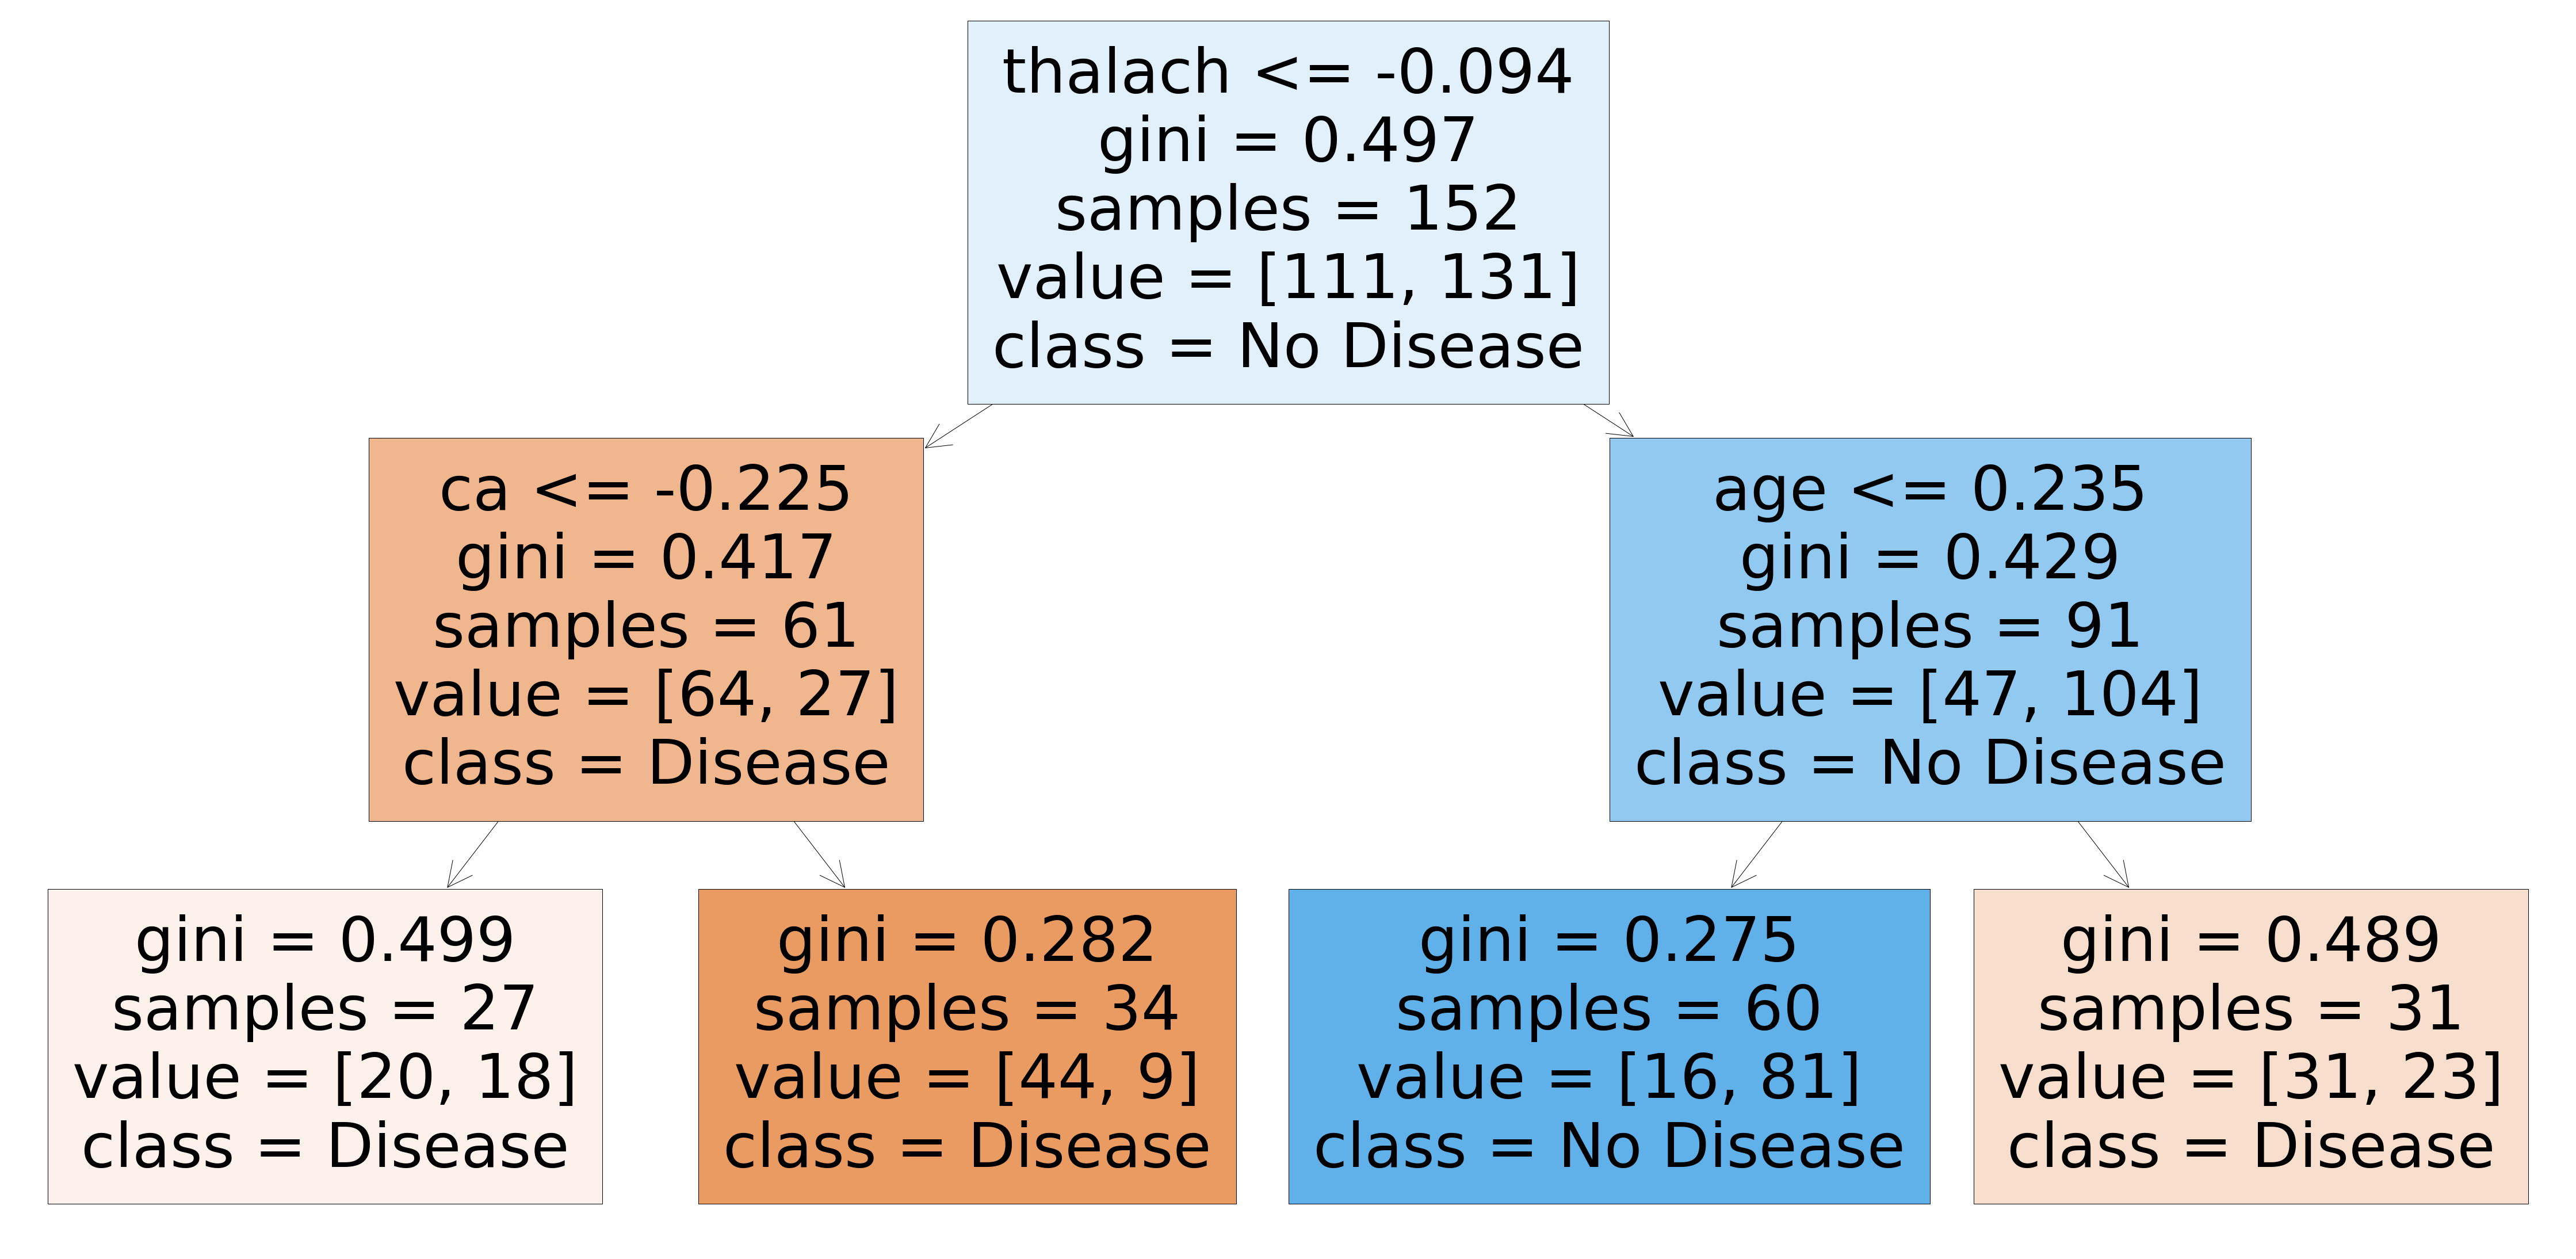

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

age         0.047767
sex         0.010784
cp          0.193194
trestbps    0.012628
chol        0.013701
fbs         0.000000
restecg     0.009024
thalach     0.112944
exang       0.145147
oldpeak     0.109498
slope       0.038536
ca          0.192768
thal        0.114009
dtype: float64


<AxesSubplot:>

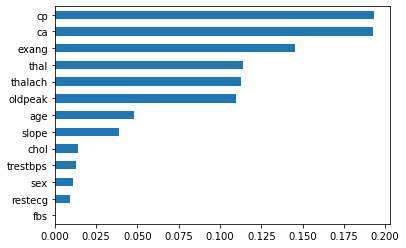

In [30]:
array = rf_model.feature_importances_
s1 = pd.Series(array,index = x.columns)
print(s1)
s1.sort_values().plot(kind='barh')

# Drop least important feature

In [31]:
xtrain=xtrain.drop(['fbs'],axis=1)
xtest=xtest.drop(['fbs'],axis=1)

In [32]:
clf=RandomForestClassifier(random_state=35)
clf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=35)

In [33]:
clf.score(xtrain,ytrain)

1.0

In [34]:
clf.score(xtest,ytest)

0.8524590163934426

In [35]:
rf_model  = RandomForestClassifier(random_state=101)

hyp = {'max_depth':np.arange(2,10),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15)}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=9)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(random_state=101),
                   param_distributions={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [36]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, random_state=101)

In [37]:
ypredtrain = rf_model.predict(xtrain)

accuracy_score(ytrain,ypredtrain)

0.8677685950413223

In [38]:
ypredtest = rf_model.predict(xtest)

accuracy_score(ytest,ypredtest)

0.8524590163934426

In [40]:
confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classification report:\n ',classificationreport)

confusion matrix:
 [[ 85  25]
 [  7 125]]
classification report:
                precision    recall  f1-score   support

           0       0.92      0.77      0.84       110
           1       0.83      0.95      0.89       132

    accuracy                           0.87       242
   macro avg       0.88      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242



In [41]:
confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classification report:\n ',classificationreport)

confusion matrix:
 [[22  6]
 [ 3 30]]
classification report:
                precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

